In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel('BTC_Footprints_v1.xlsx')


array([[<Axes: title={'center': 'BTCENEMAX'}>,
        <Axes: title={'center': 'BTCENEMIN'}>,
        <Axes: title={'center': 'BTCENEGUE'}>,
        <Axes: title={'center': 'BTCEMI_MAX'}>],
       [<Axes: title={'center': 'BTCEMI_MIN'}>,
        <Axes: title={'center': 'BTCEMI_GUE'}>,
        <Axes: title={'center': 'BTCOAL_MAX'}>,
        <Axes: title={'center': 'BTCOAL_MIN'}>],
       [<Axes: title={'center': 'BTCOAL_GUE'}>,
        <Axes: title={'center': 'BTCOIL_MAX'}>,
        <Axes: title={'center': 'BTCOIL_MIN'}>,
        <Axes: title={'center': 'BTCOIL_GUE'}>],
       [<Axes: title={'center': 'BTCGAS_MAX'}>,
        <Axes: title={'center': 'BTCGAS_MIN'}>,
        <Axes: title={'center': 'BTCGAS_GUE'}>, <Axes: >]], dtype=object)

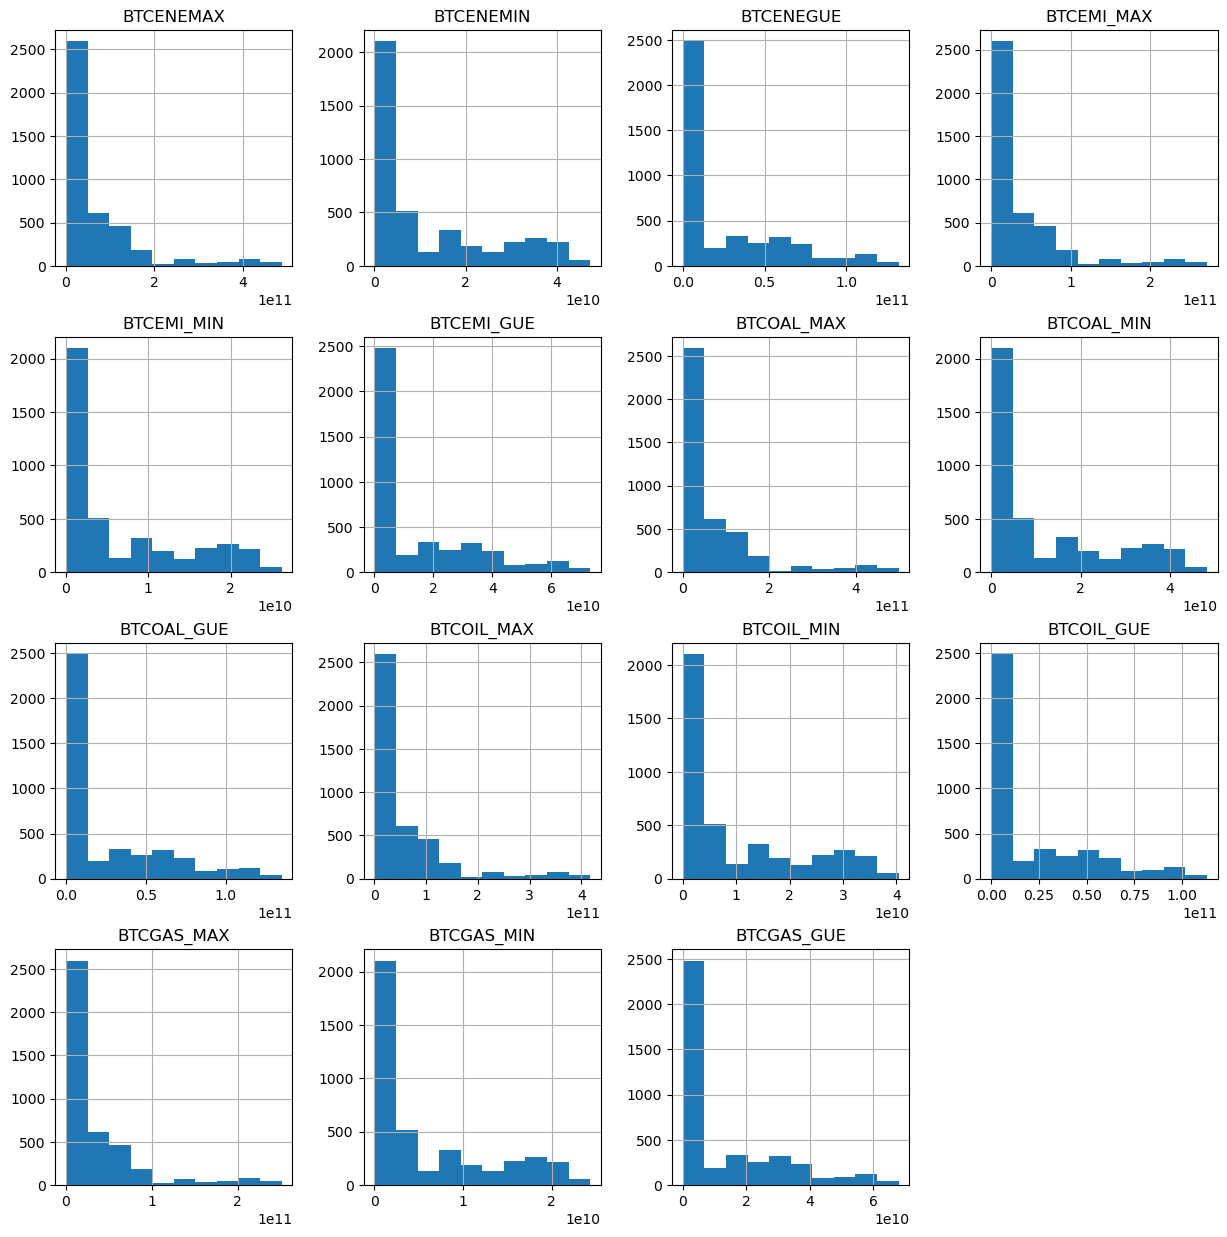

In [4]:
df.hist(figsize=(15, 15))


In [5]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4158 non-null   object 
 1   BTCENEMAX   4158 non-null   float64
 2   BTCENEMIN   4158 non-null   float64
 3   BTCENEGUE   4158 non-null   float64
 4   BTCEMI_MAX  4158 non-null   float64
 5   BTCEMI_MIN  4158 non-null   float64
 6   BTCEMI_GUE  4158 non-null   float64
 7   BTCOAL_MAX  4158 non-null   float64
 8   BTCOAL_MIN  4158 non-null   float64
 9   BTCOAL_GUE  4158 non-null   float64
 10  BTCOIL_MAX  4158 non-null   float64
 11  BTCOIL_MIN  4158 non-null   float64
 12  BTCOIL_GUE  4158 non-null   float64
 13  BTCGAS_MAX  4158 non-null   float64
 14  BTCGAS_MIN  4158 non-null   float64
 15  BTCGAS_GUE  4158 non-null   float64
dtypes: float64(15), object(1)
memory usage: 519.9+ KB


In [6]:
new_df=df.copy(deep=True)
df.drop(columns="Date",inplace=True)

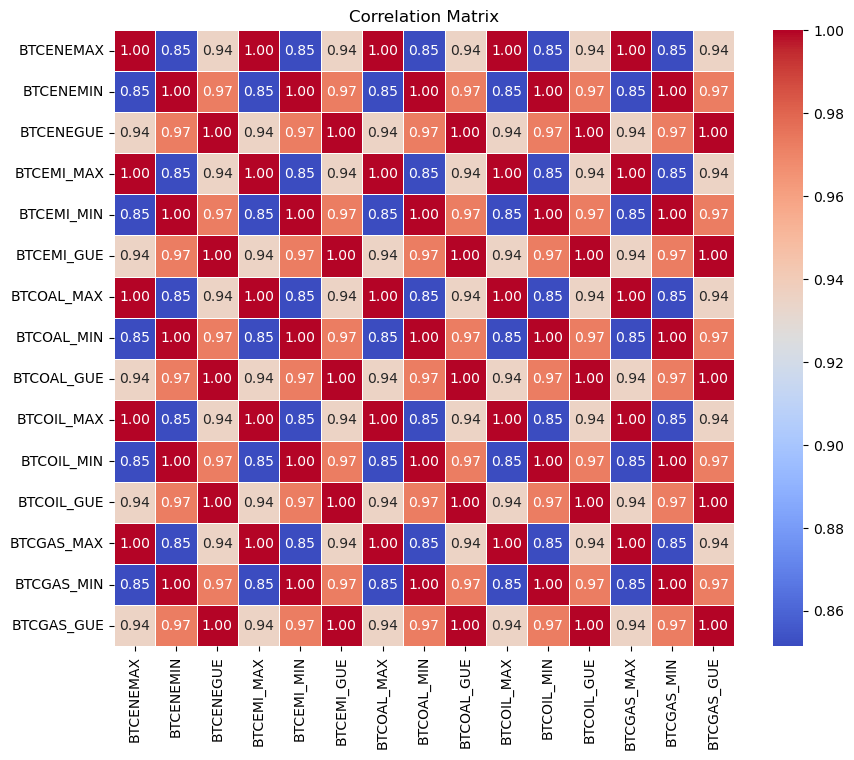

In [7]:

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
new_df.info()
new_df["Date"]=pd.to_datetime(new_df["Date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4158 non-null   object 
 1   BTCENEMAX   4158 non-null   float64
 2   BTCENEMIN   4158 non-null   float64
 3   BTCENEGUE   4158 non-null   float64
 4   BTCEMI_MAX  4158 non-null   float64
 5   BTCEMI_MIN  4158 non-null   float64
 6   BTCEMI_GUE  4158 non-null   float64
 7   BTCOAL_MAX  4158 non-null   float64
 8   BTCOAL_MIN  4158 non-null   float64
 9   BTCOAL_GUE  4158 non-null   float64
 10  BTCOIL_MAX  4158 non-null   float64
 11  BTCOIL_MIN  4158 non-null   float64
 12  BTCOIL_GUE  4158 non-null   float64
 13  BTCGAS_MAX  4158 non-null   float64
 14  BTCGAS_MIN  4158 non-null   float64
 15  BTCGAS_GUE  4158 non-null   float64
dtypes: float64(15), object(1)
memory usage: 519.9+ KB


In [9]:
new_df.set_index("Date",inplace=True)

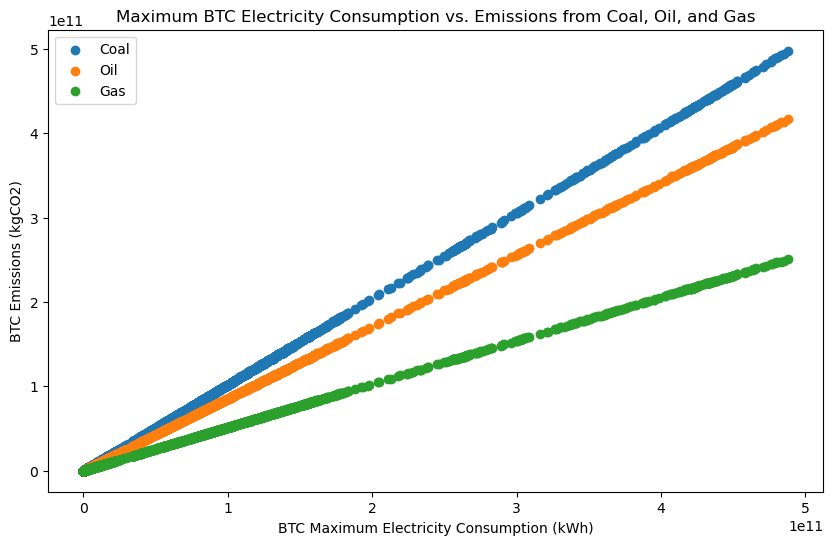

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BTCENEMAX'], df['BTCOAL_MAX'], label='Coal')
plt.scatter(df['BTCENEMAX'], df['BTCOIL_MAX'], label='Oil')
plt.scatter(df['BTCENEMAX'], df['BTCGAS_MAX'], label='Gas')
plt.xlabel('BTC Maximum Electricity Consumption (kWh)')
plt.ylabel('BTC Emissions (kgCO2)')
plt.title('Maximum BTC Electricity Consumption vs. Emissions from Coal, Oil, and Gas')
plt.legend()
plt.show()




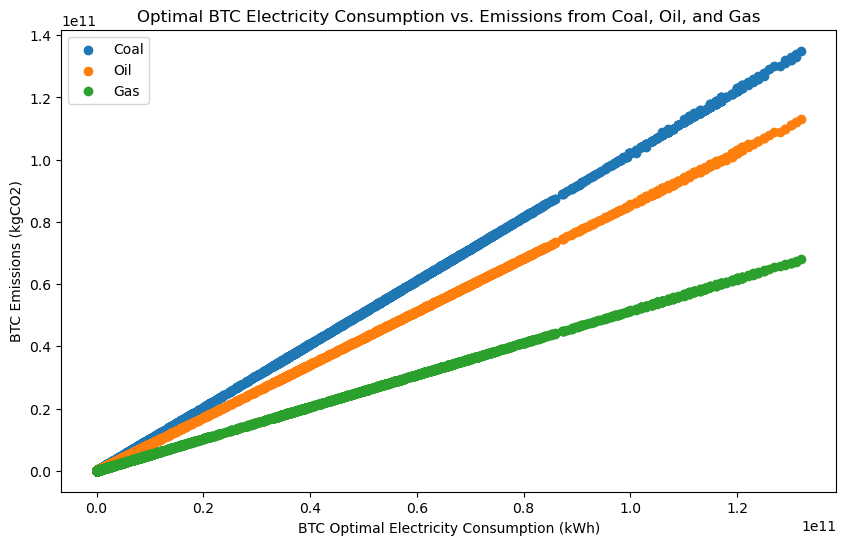

In [11]:
# Scatter plot for optimal BTC electricity consumption vs. emissions from coal, oil, and gas
plt.figure(figsize=(10, 6))
plt.scatter(df['BTCENEGUE'], df['BTCOAL_GUE'], label='Coal')
plt.scatter(df['BTCENEGUE'], df['BTCOIL_GUE'], label='Oil')
plt.scatter(df['BTCENEGUE'], df['BTCGAS_GUE'], label='Gas')
plt.xlabel('BTC Optimal Electricity Consumption (kWh)')
plt.ylabel('BTC Emissions (kgCO2)')
plt.title('Optimal BTC Electricity Consumption vs. Emissions from Coal, Oil, and Gas')
plt.legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
df_scaled=scale.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

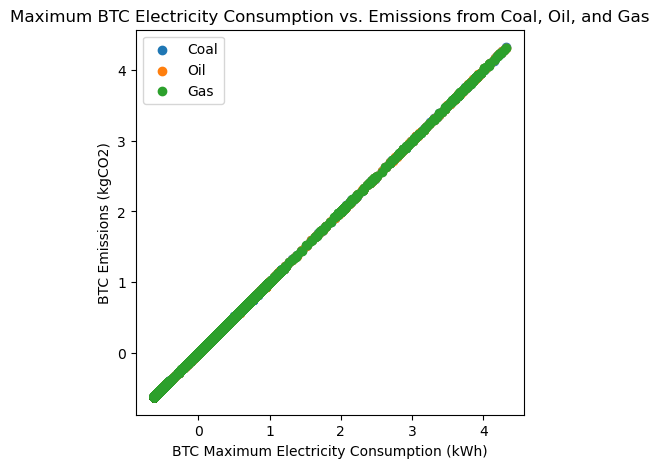

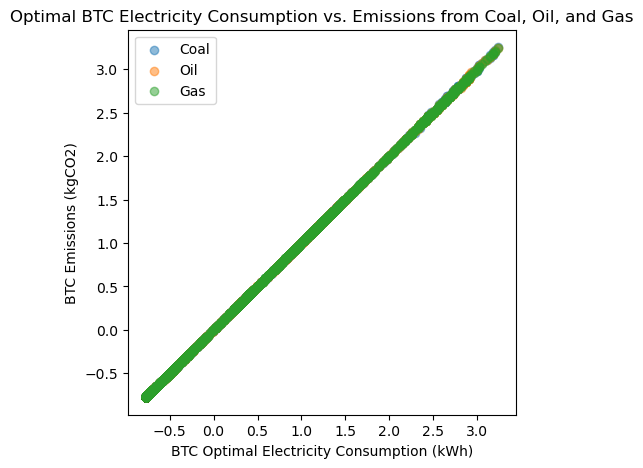

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(df_scaled['BTCENEMAX'], df_scaled['BTCOAL_MAX'], label='Coal')
plt.scatter(df_scaled['BTCENEMAX'], df_scaled['BTCOIL_MAX'], label='Oil')
plt.scatter(df_scaled['BTCENEMAX'], df_scaled['BTCGAS_MAX'], label='Gas')
plt.xlabel('BTC Maximum Electricity Consumption (kWh)')
plt.ylabel('BTC Emissions (kgCO2)')
plt.title('Maximum BTC Electricity Consumption vs. Emissions from Coal, Oil, and Gas')
plt.legend()
plt.show()


plt.figure(figsize=(5, 5))
plt.scatter(df_scaled['BTCENEGUE'], df_scaled['BTCOAL_GUE'], label='Coal',alpha=0.5)
plt.scatter(df_scaled['BTCENEGUE'], df_scaled['BTCOIL_GUE'], label='Oil',alpha=0.5)
plt.scatter(df_scaled['BTCENEGUE'], df_scaled['BTCGAS_GUE'], label='Gas', alpha=0.5)
plt.xlabel('BTC Optimal Electricity Consumption (kWh)')
plt.ylabel('BTC Emissions (kgCO2)')
plt.title('Optimal BTC Electricity Consumption vs. Emissions from Coal, Oil, and Gas')
plt.legend()
plt.show()

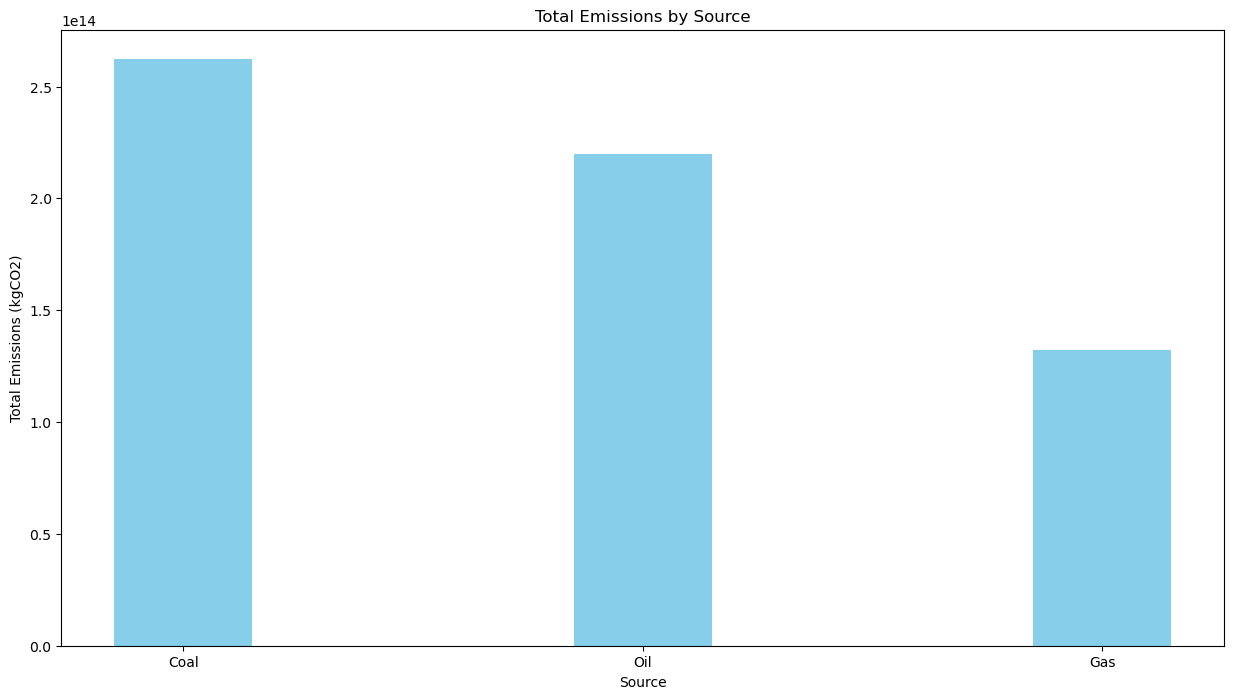

In [14]:
total_coal_emissions = df['BTCOAL_MAX'].sum()
total_oil_emissions = df['BTCOIL_MAX'].sum()
total_gas_emissions = df['BTCGAS_MAX'].sum()

total_emissions = {
    'Coal': total_coal_emissions,
    'Oil': total_oil_emissions,
    'Gas': total_gas_emissions
}

plt.figure(figsize=(15, 8))
plt.bar(total_emissions.keys(), total_emissions.values(),width=0.3, color='skyblue')
plt.xlabel('Source'),
plt.ylabel('Total Emissions (kgCO2)')
plt.title('Total Emissions by Source')
plt.show()

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4158 entries, 2010-07-18 to 2021-04-12
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BTCENEMAX   4158 non-null   float64
 1   BTCENEMIN   4158 non-null   float64
 2   BTCENEGUE   4158 non-null   float64
 3   BTCEMI_MAX  4158 non-null   float64
 4   BTCEMI_MIN  4158 non-null   float64
 5   BTCEMI_GUE  4158 non-null   float64
 6   BTCOAL_MAX  4158 non-null   float64
 7   BTCOAL_MIN  4158 non-null   float64
 8   BTCOAL_GUE  4158 non-null   float64
 9   BTCOIL_MAX  4158 non-null   float64
 10  BTCOIL_MIN  4158 non-null   float64
 11  BTCOIL_GUE  4158 non-null   float64
 12  BTCGAS_MAX  4158 non-null   float64
 13  BTCGAS_MIN  4158 non-null   float64
 14  BTCGAS_GUE  4158 non-null   float64
dtypes: float64(15)
memory usage: 519.8 KB


In [16]:

new_df = new_df.resample("Y").mean()



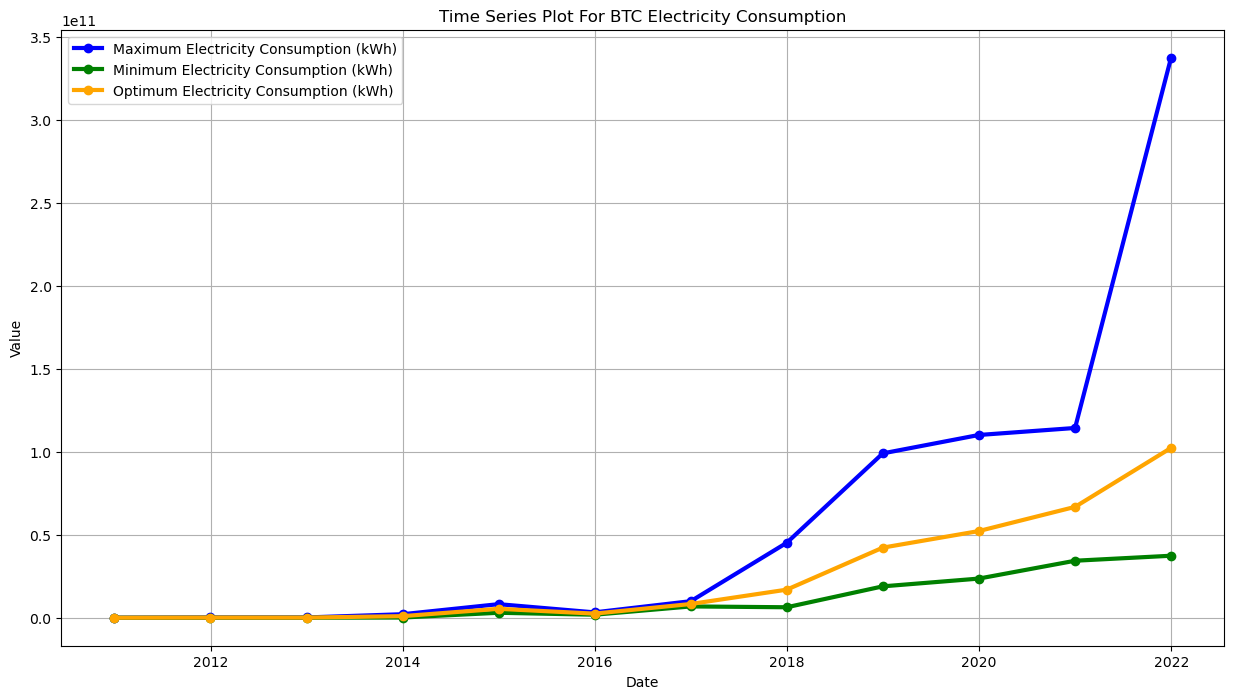

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(new_df.index, new_df['BTCENEMAX'], label='Maximum Electricity Consumption (kWh)',color='blue', linestyle='-', linewidth=3,marker='o')
plt.plot(new_df.index, new_df['BTCENEMIN'], label='Minimum Electricity Consumption (kWh)',color='green', linestyle='-', linewidth=3,marker='o')
plt.plot(new_df.index, new_df['BTCENEGUE'], label='Optimum Electricity Consumption (kWh)',color='orange', linestyle='-', linewidth=3,marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot For BTC Electricity Consumption')
plt.grid(True)
plt.legend(loc='upper left')  
plt.show()

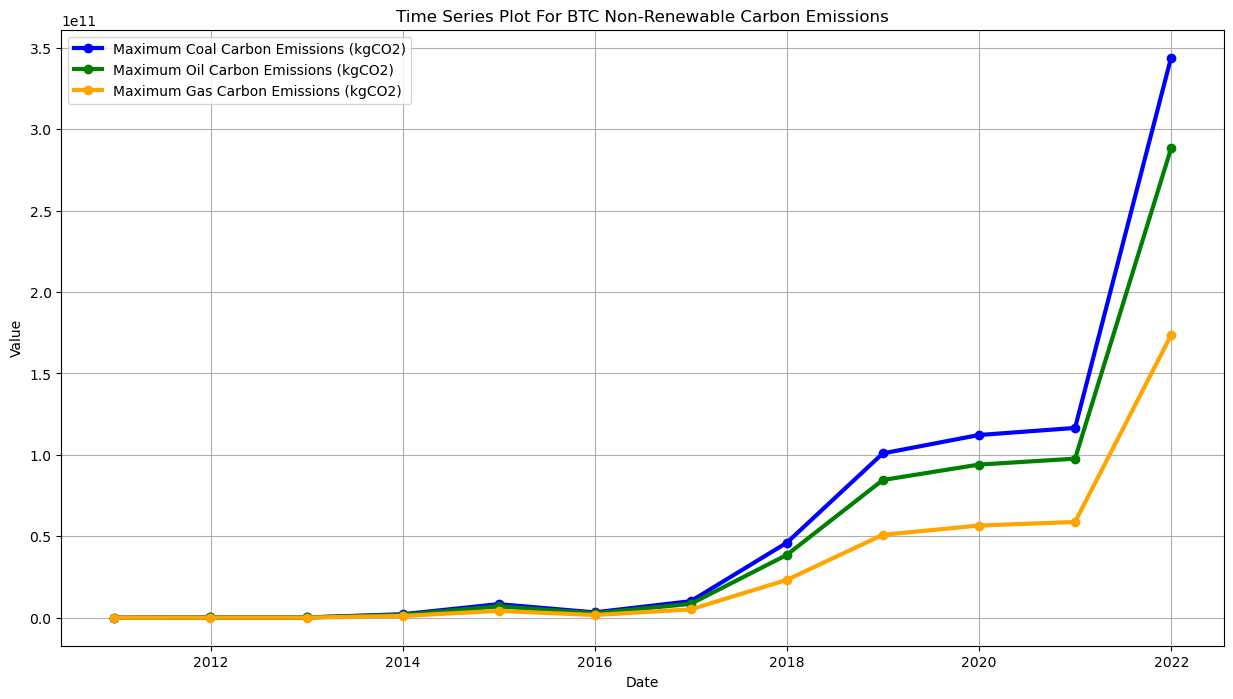

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(new_df.index, new_df['BTCOAL_MAX'], label='Maximum Coal Carbon Emissions (kgCO2)',color='blue', linestyle='-', linewidth=3,marker='o')
plt.plot(new_df.index, new_df['BTCOIL_MAX'], label='Maximum Oil Carbon Emissions (kgCO2)',color='green', linestyle='-', linewidth=3,marker='o')
plt.plot(new_df.index, new_df['BTCGAS_MAX'], label='Maximum Gas Carbon Emissions (kgCO2)',color='orange', linestyle='-', linewidth=3,marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot For BTC Non-Renewable Carbon Emissions')
plt.grid(True)
plt.legend(loc='upper left')  